In [1]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_blobs

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
data, label = make_blobs(n_samples=500, centers=2)

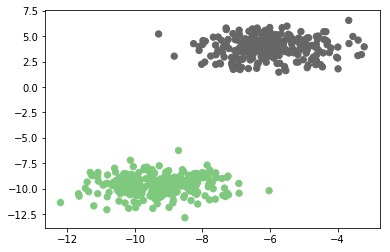

In [3]:
# draw picture
plt.scatter(data[:,0], data[:,1], s=40, c=label, cmap=plt.cm.Accent)

In [4]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1]) 

# Set model weights
W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

# Logistic regression without sigmoid activation
predict = tf.matmul(x,W) + b

In [5]:
# Cross entropy
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=predict))

In [6]:
# SGD
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [7]:
# sigmoid function
def sigmoid(x): 
    return 1.0 / (1.0 + np.exp(-x))

In [8]:
init = tf.global_variables_initializer()

In [9]:
sess = tf.InteractiveSession()
sess.run(init)

## 訓練 1000 次看看結果如何

In [10]:
rsLabel = label.reshape(500, 1)
for i in range(1000):
    _, c = sess.run([optimizer, cost], feed_dict={x: data, y: rsLabel})

In [11]:
feed_dict = {x: data}
classification = sess.run(predict, feed_dict)
classification = sigmoid(classification)
classification[classification>=0.5] = 1
classification[classification<0.5] = 0

In [12]:
def accuary(label, result):
    cnt = 0;
    for i in range(0, len(label)):
        if (float(label[i]) == result[i][0]):
            cnt += 1;
        else:
            pass;
            #print("i:%d label[i]=%r result[i][0]:%r" % (i, label[i], result[i][0]))
    #print("equal cnt=%d" % (cnt))
    return (float(cnt) / label.shape[0]);

In [13]:
print("Accuary:%f" % (accuary(label, classification)))

Accuary:1.000000


In [14]:
def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    pred_every_point = np.c_[xx.ravel(), yy.ravel()]
    feed_dict = {x: pred_every_point}
    Z = sess.run(model, feed_dict)
    Z = sigmoid(Z)
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

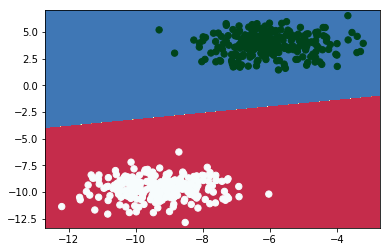

In [15]:
plot_decision_boundary(data, label, predict)